# Fake News Detection Model using NLP

We will use the Naive Bayes classifier to train a model and the [Fake and real news dataset](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset) from Kaggle.

In [ ]:
# Only support python 3.9.x for Apple Silicon
%pip install -q -U --pre pycaret

## 1. Imports

In [4]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from tqdm.auto import tqdm

tqdm.pandas()

## 2. Load the Data

Load 2 datasets the Fake news and True news

Then add a col to indicate whether it is_fake or not

In [5]:
fake_news_path = "./Inputs/Fake.csv"
true_news_path = "./Inputs/True.csv"

fake_news = pd.read_csv(fake_news_path)
true_news = pd.read_csv(true_news_path)
fake_news['is_fake'] = 1
true_news['is_fake'] = 0
news = pd.concat([fake_news, true_news], ignore_index=True)

news.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


## 3. Preprocess the Text Data

Load the English language model from Spacy and define the stop words.

`preprocess_text` remove the stop words and use lemma to reduce text to basic form.
Then apply this preprocessing function to the text col

In [7]:
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def preprocess_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop]
    return " ".join(lemmas)

news['text'] = news['text'].progress_apply(preprocess_text)
news.head()

100%|██████████| 44898/44898 [54:11<00:00, 13.81it/s]  


,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump couldn t wish americans happy new...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"friday , reveal milwaukee sheriff david clarke...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"christmas day , donald trump announce work ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis annual christmas day message rebu...,News,"December 25, 2017",1


## 4. Vectorize the Text Data

Using the bag-of-words method to vectorized text.
Then fit into the training data and transform it.

In [8]:
vectorizer = CountVectorizer()
X_train = news['text']
y_train = news['is_fake']
X_train_vect = vectorizer.fit_transform(X_train)

X_test = X_train
y_test = y_train
X_test_vect = vectorizer.transform(X_test)

print("Training data shape:", X_train_vect.shape)
print("Testing data shape:", X_test_vect.shape)

Training data shape: (44898, 111669)
Testing data shape: (44898, 111669)


## 5. Train a Naive Bayes Classifier

Train the classifier using`MultinomialNB` from sklearn.

In [9]:
clf = MultinomialNB()
clf.fit(X_train_vect, y_train)

clf

MultinomialNB()

## 6. Evaluate the Model

Using the test data to evalutate the model.
Then use various functions to compute the evaluation metrics.
And visiualize it

Accuracy: 0.9603323087888102
Confusion Matrix:
[[20582   835]
 [  946 22535]]
Classification Report:
              precision    recall  f1-score   support

        True       0.96      0.96      0.96     21417
        Fake       0.96      0.96      0.96     23481

    accuracy                           0.96     44898
   macro avg       0.96      0.96      0.96     44898
weighted avg       0.96      0.96      0.96     44898



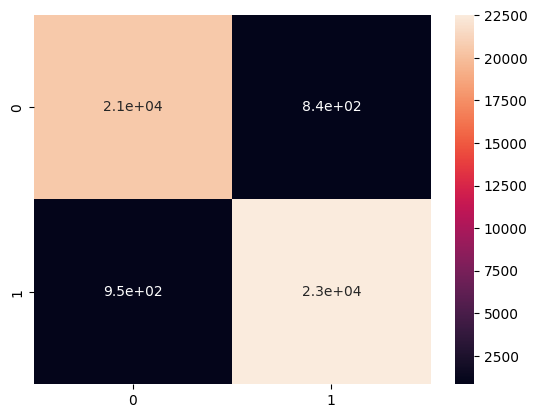

In [10]:
y_pred = clf.predict(X_test_vect)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True)

target_names = ['True', 'Fake']
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))